In [2]:
import numpy             as np
import matplotlib.pyplot as plt

## 3 Descent Methods

### Gradient descent
* Let $\boldsymbol{Y}\in\mathbb{R}^{d\times d}$ be a blurred version
of the image $\boldsymbol{X}\in\mathbb{R}^{d\times d}$:
$$\boldsymbol{Y}=\boldsymbol{H}\boldsymbol{X}\boldsymbol{H}^{T}$$
where $\boldsymbol{H}\in\mathbb{R}^{d\times d}$ is a known (separable)
blurring matrix.

#### Load the data ($\boldsymbol{Y}$ and $\boldsymbol{H}$):

In [3]:
from scipy.io import loadmat

data = loadmat('data.mat')
Y    = data['Y']
H    = data['H']

Y.shape, H.shape

((256, 256), (256, 256))

#### Plot $Y$ and $H$:

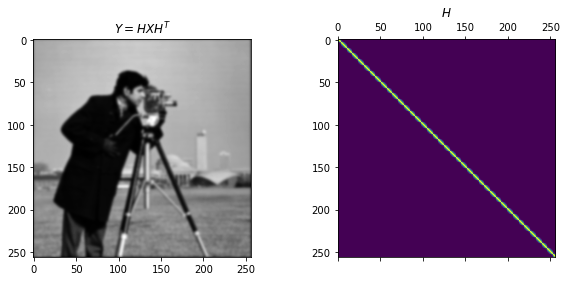

In [4]:
_, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].imshow   (Y, cmap='gray')
ax[1].matshow  (H)
ax[0].set_title('$Y = H X H^T$')
ax[1].set_title('$H$')
plt.show       ()

* Our goal is to find $\boldsymbol{X}$ that minimizes:
$$\boldsymbol{X}^{\star}=\arg\min_{\boldsymbol{X}}f\left(\boldsymbol{X}\right)=\arg\min_{\boldsymbol{X}}\left\Vert \boldsymbol{Y}-\boldsymbol{H}\boldsymbol{X}\boldsymbol{H}^{T}\right\Vert _{F}^{2}$$

### 3.1
1. Find a closed form expression for $\boldsymbol{X}^{\star}$ as a function of $\boldsymbol{Y}$ and $\boldsymbol{H}$.
2. Compute $\boldsymbol{X}^{\star}$ and plot it.

**Tip:** Avoid inverting the same matrix twice!

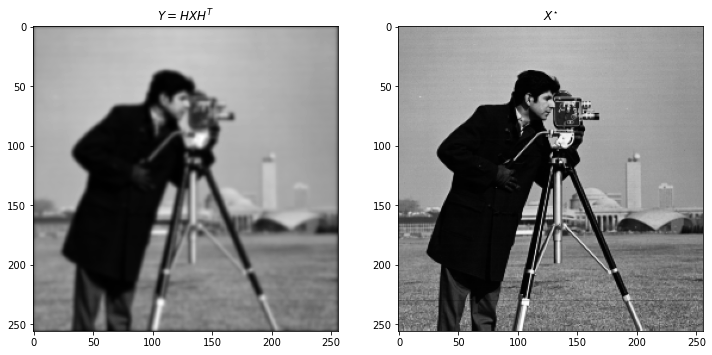

In [5]:
####################################
##--Your code here...
H_inv = np.linalg.inv(H)
H_T_inv = np.linalg.inv(H.T)
Xstar = H_inv @ Y @ H_T_inv
####################################

_, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow   (Y,     cmap='gray')
ax[1].imshow   (Xstar, cmap='gray')
ax[0].set_title('$Y = H X H^T$')
ax[1].set_title('$X^{\star}$')
plt.show       ()

------------------------------------------------------------------------------------------------------
* To avoid matrix inversion, we will find $\boldsymbol{X}^{\star}$ using gradient descent.
### 3.2
1. Implement the following functions **(in the cell below)** where
$$f\left(\boldsymbol{X}\right)=\left\Vert \boldsymbol{Y}-\boldsymbol{H}\boldsymbol{X}\boldsymbol{H}^{T}\right\Vert _{F}^{2}$$

```python
#==================================================#
def f(X):
#==================================================#
def Df(X):
#==================================================#
def ApplyGradientDescent(f, Df, X0, lr, ε):
#==================================================#
```

2. Set a reasonable starting point $\boldsymbol{X}^{\left(0\right)}$.
3. Find $\boldsymbol{X}$ such that $f\left(\boldsymbol{X}\right)<\epsilon$ where $\epsilon=10^{-4}$.
    * Time your function.
    * Plot the final obtained $\boldsymbol{X}$. 

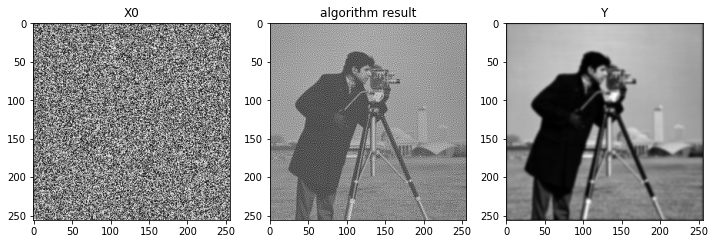

In [41]:
####################################################
##--Your code here...

#-- 1
#==================================================#

def f(X):
    '''
    f(X) = ||Y - HXH^T||_F^2 is the objective function
    '''
    
    return (np.linalg.norm((Y - (H @ X @ H.T)))) ** (2)
    
    
#==================================================#
#==================================================#

def Df(X):
    '''
    Df(X) = ∇f(X) is the objective gradient
    '''
    return (-2) * (H.T) @ (Y - H @ X @ H.T) @ H

    
    
#==================================================#
#==================================================#
def ApplyGradientDescent(f, Df, X0, lr, ε):
    '''
    Apply gradient descent.
    Args:
        f  - Objective function
        Df - Objective gradient
        X0 - Initial point
        lr - Learning rate (step size)
        ε  - Stopping criterion value
    Output:
        X  - The converged X
    Stopping criterion:
        Stop iterate when f(X) < ε
    '''

    xk = X0
    loss = f(xk)
    while  loss > ε:
        
        xk = xk - lr * Df(xk)
        loss = f(xk)
        
    return xk
#==================================================#

##-- 2.


stop_at_loss = 0.001

lr = 0.95
b = np.random.rand(*Y.shape)
x_start_gd = ApplyGradientDescent(f, Df, b, lr, stop_at_loss)

_, ax = plt.subplots(1, 3, figsize=(12, 6))

ax[0].imshow   (b, cmap='gray')
ax[1].imshow   (x_start_gd,cmap='gray')
ax[2].imshow   (Y,cmap='gray')

ax[0].set_title('X0')
ax[1].set_title('algorithm result')
ax[2].set_title('Y')
plt.show()

##-- 3.


####################################################

------------------------------------------------------------------------------------------------------
<div class="alert alert-block alert-warning">
<span style="color:black">

**Momentum**
* <ins>Momentum</ins> is an effective method to improve convergence rate.
* Gradient descent update rule:
$$\boldsymbol{x}^{\left(t\right)}=\boldsymbol{x}^{\left(t-1\right)}-\mu\nabla f\left(\boldsymbol{x}^{\left(t-1\right)}\right)$$
* Momentum update rule:
$$\boldsymbol{x}^{\left(t\right)}=\boldsymbol{x}^{\left(t-1\right)}-\mu\nabla f\left(\boldsymbol{x}^{\left(t-1\right)}\right)+\beta\left(\boldsymbol{x}^{\left(t-1\right)}-\boldsymbol{x}^{\left(t-2\right)}\right)$$
where $\beta\in[0,1)$ and typically $0.9\leq\beta\leq0.99$.

</span>
</div>
    
### 3.3
Show that $\boldsymbol{x}^{\left(t\right)}$ can be expressed by:
$$\boldsymbol{x}^{\left(t+1\right)}=\boldsymbol{x}^{\left(t\right)}-\mu\sum_{s=0}^{t}\beta^{t-s}\nabla f\left(\boldsymbol{x}^{\left(s\right)}\right)$$

I will shaow that $\boldsymbol{x}^{\left(t+1\right)}=\boldsymbol{x}^{\left(t\right)}-\mu\sum_{s=0}^{t}\beta^{t-s}\nabla f\left(\boldsymbol{x}^{\left(s\right)}\right)$ is giving the same result as the momentum update rule:

$x^{(t+1)} = x^{(t)}-\mu \nabla f(x^{(t)})+\beta (x^{(t)}-x^{(t-1)})$

$x^{(t)} = x^{(t-1)}-\mu \nabla f(x^{(t-1)})+\beta (x^{(t-1)}-x^{(t-2)})$

$x^{(t+1)} = x^{(t)}-\mu \nabla f(x^{(t)})+\beta (x^{(t-1)}-\mu \nabla f(x^{(t-1)})+\beta (x^{(t-1)}-x^{(t-2)})-x^{(t-1)})$

$x^{(t+1)} = x^{(t)}-\mu \nabla f(x^{(t)})+\beta (-\mu \nabla f(x^{(t-1)})+\beta (x^{(t-1)}-x^{(t-2)}))$

$x^{(t-1)} = x^{(t-2)}-\mu \nabla f(x^{(t-2)})+\beta (x^{(t-2)}-x^{(t-3)})$

$x^{(t+1)} = x^{(t)}-\mu \nabla f(x^{(t)})+\beta (-\mu \nabla f(x^{(t-1)})+\beta (x^{(t-2)}-\mu \nabla f(x^{(t-2)})+\beta (x^{(t-2)}-x^{(t-3)})-x^{(t-2)}))$

$x^{(t+1)} = x^{(t)}-\mu \nabla f(x^{(t)})+\beta (-\mu \nabla f(x^{(t-1)})+\beta (-\mu \nabla f(x^{(t-2)})+\beta (x^{(t-2)}-x^{(t-3)})))=\boldsymbol{x}^{\left(t\right)}-\mu\sum_{s=0}^{t}\beta^{t-s}\nabla f\left(\boldsymbol{x}^{\left(s\right)}\right)$

### 3.4
1. Implement the following function:

```python
#====================================================#
def ApplyGradientDescentMomentum(f, Df, X0, lr, β, ε):
#====================================================#
```

2. Set (the same) reasonable starting point $\boldsymbol{X}^{\left(0\right)}$.
3. Find $\boldsymbol{X}$ such that $f\left(\boldsymbol{X}\right)<\epsilon$ where $\epsilon=10^{-4}$.
    * Time your function.
    * Plot the final obtained $\boldsymbol{X}$. 
    * Compare the run-time performance with and without momentum.  
      (play with the hyper-parameters).
        * **2% Bonus:**  
            Plot the objective value $f(\boldsymbol{X})$ as a function of the iterations.  
            You may need to modify your code slightly.

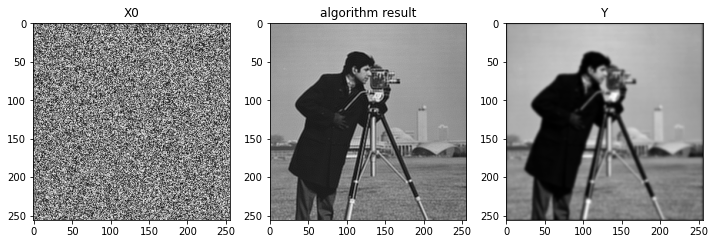

In [40]:
####################################################
##--Your code here...

#-- 1.
def ApplyGradientDescentMomentum(f, Df, X0, lr, β, ε):
    '''
    Apply gradient descent with momentum.
    Args:
        f  - Objective function
        Df - Objective gradient
        X0 - Initial point
        lr - Learning rate (step size)
        β  - Momentum decaying factor
        ε  - Stopping criterion value
    Output:
        X  - The converged X
    Stopping criterion:
        Stop iterate when f(X) < ε
    '''
    
    xk = X0
    v_pk = xk
    loss  = f(xk)
    
    while loss > ε:
        pk = Df(xk)
        v_pk = β * v_pk + (1 - β) * pk
        xk = xk - (lr * v_pk)
        loss  = f(xk)
        
    return xk


##-- 2.

lr = 0.95
b = np.random.rand(*Y.shape)
res = ApplyGradientDescentMomentum(f, Df, b, lr, 0.5, 0.001)

_, ax = plt.subplots(1, 3, figsize=(12, 6))

ax[0].imshow(b, cmap='gray')
ax[1].imshow(res, cmap='gray')
ax[2].imshow(Y, cmap='gray')

ax[0].set_title('X0')
ax[1].set_title('algorithm result')
ax[2].set_title('Y')
plt.show()


##-- 3.
